# What is the distribution of paper lengths in CSCW?
by R. Stuart Geiger ([@staeiou](http://twitter.com/staeiou)), Berkeley Institute for Data Science

Freely licensed under both [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/) and [The MIT License](https://opensource.org/licenses/MIT).

## Introduction
In 2013, the ACM conference on Computer-Supported Cooperative Work (CSCW) removed a strict page limit, which had previously set the length for full papers at 10 pages and notes at 4 pages. Officially, papers can now be any length, from one page to infinity (or whatever the system supports). However, CSCW authors and reviewers [are told that](https://cscw.acm.org/2016/submit/papers.php) "Papers whose length is incommensurate with their contribution will be rejected." So what is the new normal for page lengths? 

I am exploring this question in this Jupyter notebook, as well as trying to document my data collection, processing, and analysis in as open and reproducible as a manner as I can. I am using a mix of bash commands and python scripts to process and collect the data.


## Data collection and processing
Import libraries we will use: Pandas and Matplotlib.

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline


I used my web browser to go to ACM Digital Library's table of contents for [CSCW 2012](http://dl.acm.org/citation.cfm?id=2145204), [2013](http://dl.acm.org/citation.cfm?id=2441776), [2014](http://dl.acm.org/citation.cfm?id=2531602), [2015](http://dl.acm.org/citation.cfm?id=2675133&preflayout=flat) and [2016](http://dl.acm.org/citation.cfm?id=2818048&preflayout=flat), which has page numbers for every paper in plain text. Note that these table of contents do not include the "companion" proceedings, which are a separate published proceedings series that contains workshop proposals and extended abstracts for posters. Some years, one to two page abstracts for keynotes are included in the core proceedings, while other years they are included in the companion proceedings.

I did a very low-tech, non-automated way of importing the data (which also doesn't violate the ACM Digital Library's strict [terms of service](http://librarians.acm.org/policies#anchor4), which expressly prohibits automated scraping of metadata or articles. I selected the entire table of contents in my browser, then copied and pasted the HTML as plain text into a text editor. These plain text table of contents files are up on my website. 

To download these text files, use the command line shell interface. I know you can do fancier loops for processing large numbers of files and data frames in sequence, but I am keeping it simple for now.

In [2]:
!wget https://raw.githubusercontent.com/staeiou/cscw-pages/master/cscw-12.txt
!wget https://raw.githubusercontent.com/staeiou/cscw-pages/master/cscw-13.txt
!wget https://raw.githubusercontent.com/staeiou/cscw-pages/master/cscw-14.txt
!wget https://raw.githubusercontent.com/staeiou/cscw-pages/master/cscw-15.txt
!wget https://raw.githubusercontent.com/staeiou/cscw-pages/master/cscw-16.txt

--2016-06-04 20:58:34--  https://raw.githubusercontent.com/staeiou/cscw-pages/master/cscw-12.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 23.235.39.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|23.235.39.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80212 (78K) [text/plain]
Saving to: ‘cscw-12.txt’

cscw-12.txt         100%[=====================>]  78.33K   469KB/s   in 0.2s   

2016-06-04 20:58:39 (469 KB/s) - ‘cscw-12.txt’ saved [80212/80212]

--2016-06-04 20:58:39--  https://raw.githubusercontent.com/staeiou/cscw-pages/master/cscw-13.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 23.235.39.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|23.235.39.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67082 (66K) [text/plain]
Saving to: ‘cscw-13.txt’

cscw-13.txt         100%[=====================>]  65.51K   147KB/s   in 0.4s   



Peeking at these files using head through the command line, they have the page numbers in lines that begin with "Pages:"

In [3]:
!head -n 25 cscw-15.txt

We can use grep via the command line to just get these lines containing "Pages: ":

In [4]:
!cat cscw-15.txt | grep "Pages: " | head

I'm going to keep using the command line shell to parse these text files and put them into CSV files, which I will then load into python. So first, create the beginning of two CSV files, with headers for the start and end pages

In [5]:
!echo "start_page,end_page" > cscw-12-pages.csv
!echo "start_page,end_page" > cscw-13-pages.csv
!echo "start_page,end_page" > cscw-14-pages.csv
!echo "start_page,end_page" > cscw-15-pages.csv
!echo "start_page,end_page" > cscw-16-pages.csv

Parse these files for only lines containing "Pages: ", then remove "Pages: " and replace the dash with a comma. Append this to the CSV files.

In [6]:
!cat cscw-12.txt | grep "Pages: " | sed -e 's/Pages: //g' | sed -e 's/-/,/g' >> cscw-12-pages.csv
!cat cscw-13.txt | grep "Pages: " | sed -e 's/Pages: //g' | sed -e 's/-/,/g' >> cscw-13-pages.csv
!cat cscw-14.txt | grep "Pages: " | sed -e 's/Pages: //g' | sed -e 's/-/,/g' >> cscw-14-pages.csv
!cat cscw-15.txt | grep "Pages: " | sed -e 's/Pages: //g' | sed -e 's/-/,/g' >> cscw-15-pages.csv
!cat cscw-16.txt | grep "Pages: " | sed -e 's/Pages: //g' | sed -e 's/-/,/g' >> cscw-16-pages.csv

Load these into Pandas dataframes in python.

In [7]:
cscw12 = pd.read_csv("cscw-12-pages.csv")
cscw13 = pd.read_csv("cscw-13-pages.csv")
cscw14 = pd.read_csv("cscw-14-pages.csv")
cscw15 = pd.read_csv("cscw-15-pages.csv")
cscw16 = pd.read_csv("cscw-16-pages.csv")

## Data analysis and visualization

Create new dataframes for each year containing the length of each paper by subtracting the start page from the end page, then adding one.

In [8]:
cscw12_len = cscw12['end_page']-cscw12['start_page']+1
cscw13_len = cscw13['end_page']-cscw13['start_page']+1
cscw14_len = cscw14['end_page']-cscw14['start_page']+1
cscw15_len = cscw15['end_page']-cscw15['start_page']+1
cscw16_len = cscw16['end_page']-cscw16['start_page']+1


We can use the value_counts() function to count up the different page lengths, which we can then plot into bar charts.


### CSCW 2012, last year before 10 page limit was removed

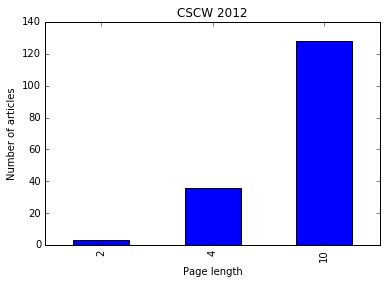

In [9]:
cscw12_plot = cscw12_len.value_counts(sort=False).plot(kind='bar',title="CSCW 2012")
cscw12_plot.set_xlabel("Page length")
cscw12_plot.set_ylabel("Number of articles")

In [10]:
cscw12_len.describe()

count    167.000000
mean       8.562874
std        2.624135
min        2.000000
25%       10.000000
50%       10.000000
75%       10.000000
max       10.000000
dtype: float64

### CSCW 2013, first year 10 page limit was removed

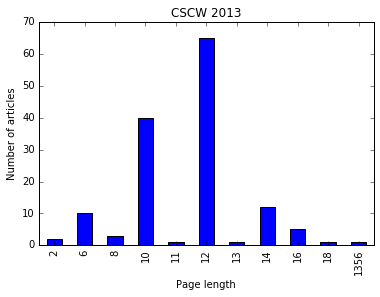

In [11]:
cscw13_plot = cscw13_len.value_counts(sort=False).plot(kind='bar',title="CSCW 2013")
cscw13_plot.set_xlabel("Page length")
cscw13_plot.set_ylabel("Number of articles")


In [12]:
cscw13_len.describe()

count     141.000000
mean       20.666667
std       113.284702
min         2.000000
25%        10.000000
50%        12.000000
75%        12.000000
max      1356.000000
dtype: float64

There are some funny things going on with this data, which I'll get to later.

### CSCW 2014

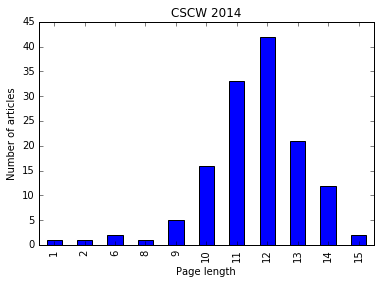

In [13]:
cscw14_plot = cscw14_len.value_counts(sort=False).plot(kind='bar',title="CSCW 2014")
cscw14_plot.set_xlabel("Page length")
cscw14_plot.set_ylabel("Number of articles")

In [14]:
cscw15_len.describe()

count    163.000000
mean      11.693252
std        2.334210
min        1.000000
25%       11.000000
50%       12.000000
75%       13.000000
max       17.000000
dtype: float64

### CSCW 2015

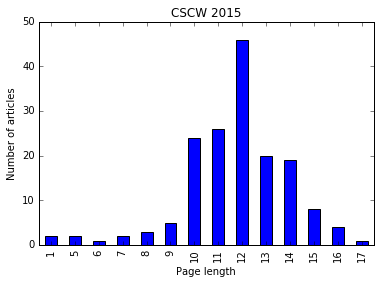

In [15]:
cscw15_plot=cscw15_len.value_counts(sort=False).plot(kind='bar',title="CSCW 2015")
cscw15_plot.set_xlabel("Page length")
cscw15_plot.set_ylabel("Number of articles")

In [16]:
cscw15_len.describe()

count    163.000000
mean      11.693252
std        2.334210
min        1.000000
25%       11.000000
50%       12.000000
75%       13.000000
max       17.000000
dtype: float64

### CSCW 2016

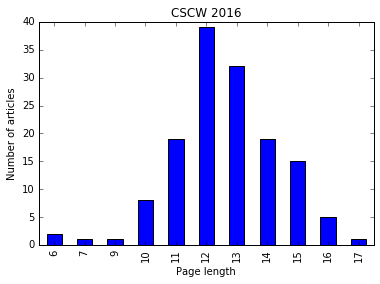

In [17]:
cscw16_plot=cscw16_len.value_counts(sort=False).plot(kind='bar',title="CSCW 2016")
cscw16_plot.set_xlabel("Page length")
cscw16_plot.set_ylabel("Number of articles")

In [18]:
cscw16_len.describe()

count    142.000000
mean      12.598592
std        1.794633
min        6.000000
25%       12.000000
50%       13.000000
75%       14.000000
max       17.000000
dtype: float64

## Discussion
If we look at the most recent proceedings for CSCW 2016, we can see that the old page length of 10 pages is well below the mean -- at least one standard deviation below. How many standard deviations below the mean is this old length? We can use the formula for calculating a z score (see [the Wikipedia article](https://en.wikipedia.org/w/index.php?title=Standard_score) for more info): 
$$z = {x- \mu \over \sigma}$$
where $x$ is the score (10 pages), $\mu$ is the mean and $\sigma$ is the standard deviation.

In [19]:
(10 - cscw16_len.mean())/cscw16_len.std()

-1.4479794496465004

### What is going on with odd page lengths for CSCW 2013?
The page lengths all fit some sort of smooth distribution, except CSCW 2013. It appears there were only a handful of articles that were 11 or 13 pages, with the overwhelming majority being 10 and 12 pages. And if you look even closer at the graph, you see there are no articles that are 7, 9, or 15 pages long. We also have a mysterious 1,356 page article. We can get the distribution of all lengths with value_counts():

In [20]:
cscw13_len.value_counts(sort=False)

2        2
6       10
8        3
10      40
11       1
12      65
13       1
14      12
16       5
18       1
1356     1
dtype: int64

So I did some spot checking to make sure this wasn't some weird artifact of the metadata... and it turns out that there is some inaccracies with the page numbers. For example:

* The metadata for [this article](http://dl.acm.org/citation.cfm?id=2441946) says it is pages 149-1504, which would make it 1,356 pages. If you look at the PDF, then it is a 6 page PDF, which is from pages 1499 to 1504. That explains this big outlier.

* The metadata for [this article](http://dl.acm.org/citation.cfm?id=2441793) says it is pages 129-144, which would make it 16 pages (page 129, page 130, page 131 .... to page 144). But if you view the full text PDF, then it is a 15 page PDF, with the page numbers 129 to 143 (and it ends short on page 143). 

* The metadata for [this next article](http://dl.acm.org/citation.cfm?id=2441794) says it is pages 145-156, which would make it 12 pages (page 145, page 146, page 147 .... to page 156). But if you view the full text PDF, then it is an 11 page PDF, with the page numbers 145 to 155 (and it ends short on page 155). 

* The metadata for [this article](http://dl.acm.org/citation.cfm?id=2441788) says it is pages 79-90, which would make it 12 pages (page 79, page 80, page 81 .... to page 90). But if you view the full text PDF, then it is an 11 page PDF, with the page numbers 79 to 89 (although it goes all the way to the end of page 89).

So these counterexamples are enough to show that the metadata is wrong in multiple cases: we have found the mistaken 1,356 page article; we have found one 15 page article, when the metadata says there are none; and we found two 11 page articles, when the metadata says there is only one.

The other articles In order to figure this out in more detail, we would need to get access to all the PDFs and analyze them to see how long those PDFs actually are. However, this would require scraping the PDFs of the ACM Digital Library, which is in violation of their [terms of service.](http://librarians.acm.org/policies#anchor4)